## Evaluating Parameter Interdependence

Test run on 10/16/15 by EB. Using SD PCB Interface Board serial number 002, SD PCB Driver Board serial number 002, and SD PCB Video Board serial number 001.

### Set up the FPE

Remember that whenever you power-cycle the Observatory Simulator, you should set preload=True below.

When you are running this notbook and it has not been power cycled, you should set preload=False.

In [1]:
from tessfpe.dhu.fpe import FPE
from tessfpe.dhu.unit_tests import check_house_keeping_voltages
import time
fpe1 = FPE(1, debug=False, preload=False, FPE_Wrapper_version='6.1.1')
print fpe1.version
time.sleep(.01)
if check_house_keeping_voltages(fpe1):
    print "Wrapper load complete. Interface voltages OK."

Observatory Simulator Version 1.6c - Oct  8 2015 11:55:03
Wrapper load complete. Interface voltages OK.


Set the operating parameters to the default values:

In [2]:
def set_fpe_defaults(fpe):
    "Set the FPE to the default operating parameters, and outputs a table of the default values"
    defaults = {}
    for k in range(len(fpe.ops.address)):
        if fpe.ops.address[k] is None:
            continue
        fpe.ops.address[k].value = fpe.ops.address[k].default
        defaults[fpe.ops.address[k].name] = fpe.ops.address[k].default
    return defaults

Get, sort, and print the default operating parameters:

In [3]:
from tessfpe.data.operating_parameters import operating_parameters

In [4]:
for k in sorted(operating_parameters.keys()):
    v = operating_parameters[k]
    print k, ":", v["default"], v["unit"]

ccd1_backside : 0.0 V
ccd1_input_diode_high : 12.0 V
ccd1_input_diode_low : 12.0 V
ccd1_input_gate_1 : -3.0 V
ccd1_input_gate_2 : -3.0 V
ccd1_output_drain_a_offset : 8.0 V
ccd1_output_drain_b_offset : 8.0 V
ccd1_output_drain_c_offset : 8.0 V
ccd1_output_drain_d_offset : 8.0 V
ccd1_output_gate : -1.0 V
ccd1_parallel_high_offset : 0.0 V
ccd1_parallel_low : -8.0 V
ccd1_reset_drain : 12.0 V
ccd1_reset_high : 3.0 V
ccd1_reset_low_offset : -3.0 V
ccd1_scupper : 12.0 V
ccd1_serial_high : 4.0 V
ccd1_serial_low_offset : -6.0 V
ccd1_substrate : -40.0 V
ccd2_backside : 0.0 V
ccd2_input_diode_high : 12.0 V
ccd2_input_diode_low : 12.0 V
ccd2_input_gate_1 : -3.0 V
ccd2_input_gate_2 : -3.0 V
ccd2_output_drain_a_offset : 8.0 V
ccd2_output_drain_b_offset : 8.0 V
ccd2_output_drain_c_offset : 8.0 V
ccd2_output_drain_d_offset : 8.0 V
ccd2_output_gate : -1.0 V
ccd2_parallel_high_offset : 0.0 V
ccd2_parallel_low : -8.0 V
ccd2_reset_drain : 12.0 V
ccd2_reset_high : 3.0 V
ccd2_reset_low_offset : -3.0 V
ccd2_s

Take a number of sets of housekeeping data, with one operating parameter varying across it's control range, then repeat for every operating parameter:

In [5]:
def get_base_name(name):
    import re
    if '_offset' not in name:
        return None
    offset_name = name
    derived_parameter_name = name.replace('_offset', '')
    base_name = None
    if 'low' in derived_parameter_name:
        base_name = derived_parameter_name.replace('low', 'high')            
    if 'high' in derived_parameter_name:
        base_name = derived_parameter_name.replace('high', 'low')
    if 'output_drain' in derived_parameter_name:
            base_name = re.sub(r'output_drain_._offset$', 'reset_drain', offset_name)
    return base_name

In [6]:
def get_derived_parameter_name(name):
    if '_offset' not in name:
        return None
    offset_name = name
    return name.replace('_offset', '')

In [7]:
set_fpe_defaults(fpe1) ;

In [12]:
data = {}

steps = 5

for k in range(len(fpe1.ops.address)):
    if fpe1.ops.address[k] is None:
        continue
    name = fpe1.ops.address[k].name
    base_name = get_base_name(name)
    derived_parameter_name = get_derived_parameter_name(name)
    if derived_parameter_name is not None:
        if derived_parameter_name not in data:
            data[derived_parameter_name] = {}
        offset_name = name
        base_low = fpe1.ops[base_name].low
        base_high = fpe1.ops[base_name].high
        offset_low = fpe1.ops[offset_name].low
        offset_high = fpe1.ops[offset_name].high
        for i in range(steps,0,-1):
            sub_data = []
            set_fpe_defaults(fpe1)
            base_value = base_low + i / float(steps) * (base_high - base_low)
            for j in range(steps, 0, -1):
                fpe1.ops[base_name].value = base_value
                fpe1.ops[offset_name].value = offset_low + j / float(steps) * (offset_high - offset_low)
                fpe1.ops.send()
                sub_data.append([fpe1.ops[base_name].value + fpe1.ops[offset_name].value,
                                 fpe1.house_keeping["analogue"][derived_parameter_name]])
            X,Y = zip(*sub_data)
            data[derived_parameter_name][base_value] = {"X": X, "Y": Y}

### Set up to plot:

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
import pylab

### Plot selected data:

In [14]:
def get_range_square(X,Y):
    return [min(X + Y), max(X + Y)]

ccd1_output_drain_a
3.0


/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


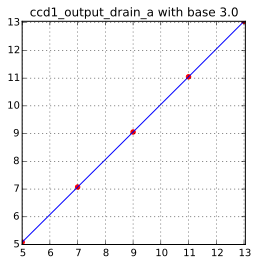

6.0


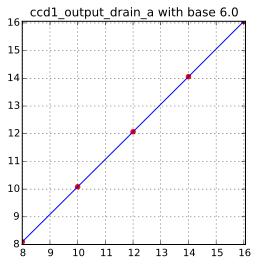

9.0


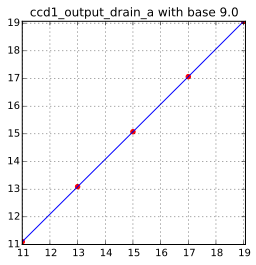

12.0


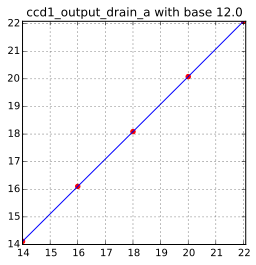

15.0


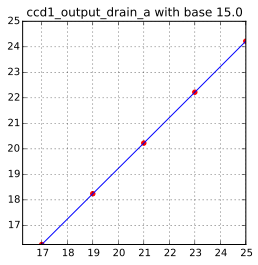

ccd1_output_drain_b
3.0


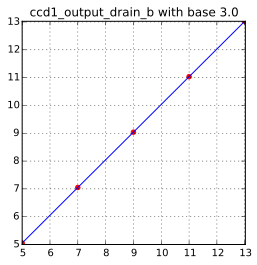

6.0


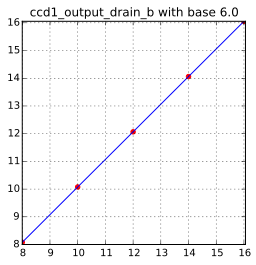

9.0


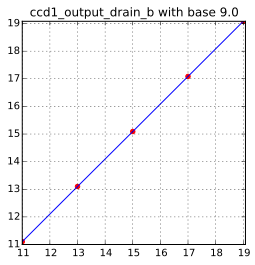

12.0


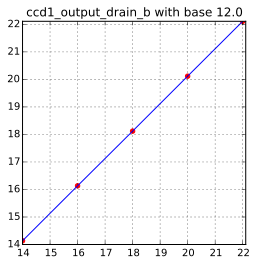

15.0


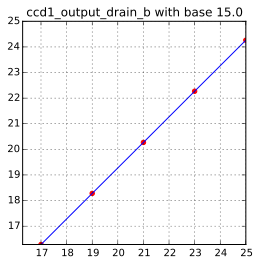

ccd1_output_drain_c
3.0


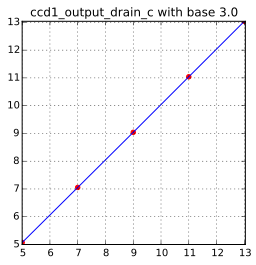

6.0


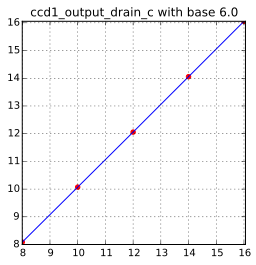

9.0


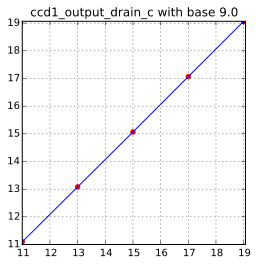

12.0


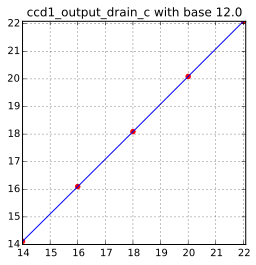

15.0


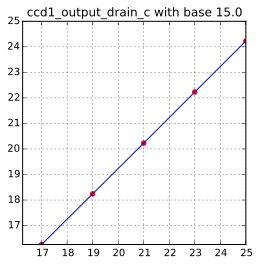

ccd1_output_drain_d
3.0


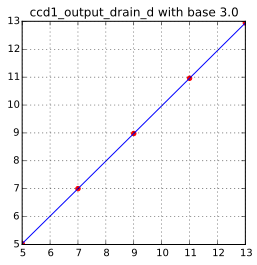

6.0


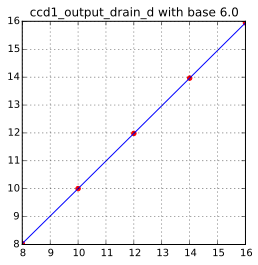

9.0


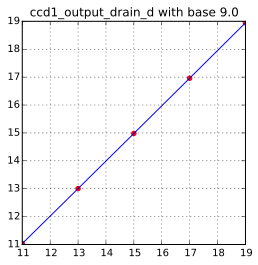

12.0


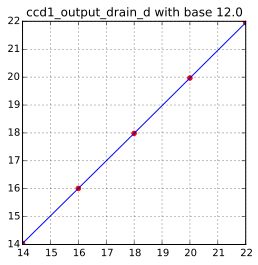

15.0


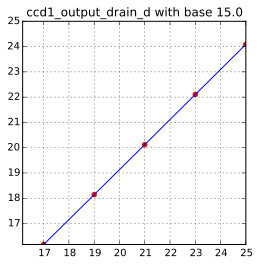

ccd1_parallel_high
-13.2


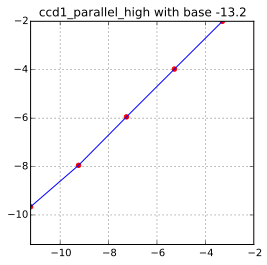

-10.56


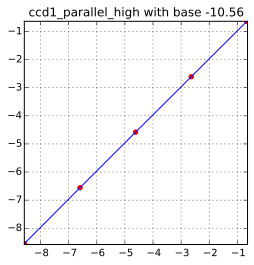

-7.92


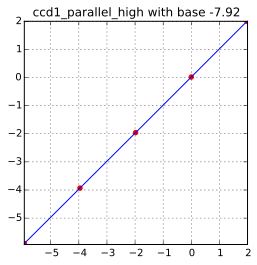

-5.28


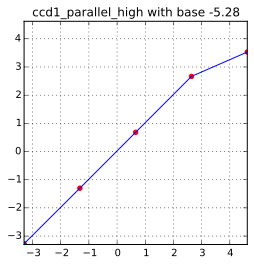

-2.64


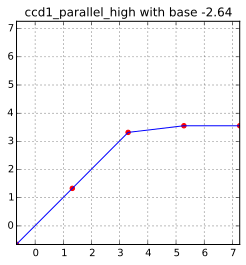

ccd1_reset_low
-10.3


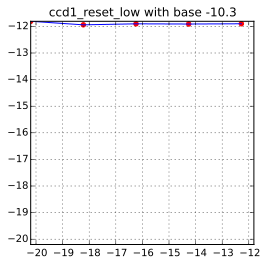

-5.24


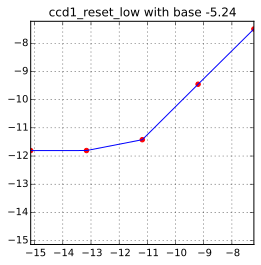

-0.18


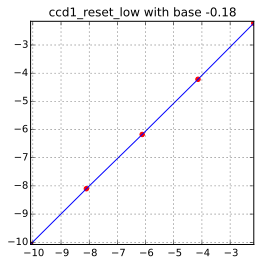

4.88


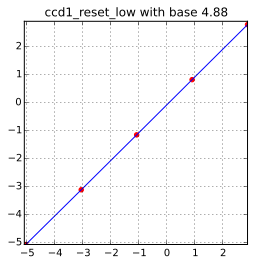

9.94


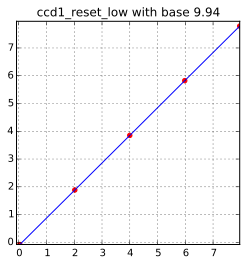

ccd1_serial_low
-10.3


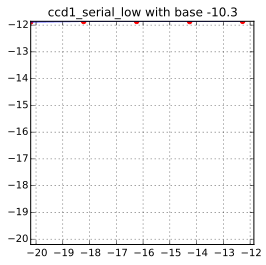

-5.24


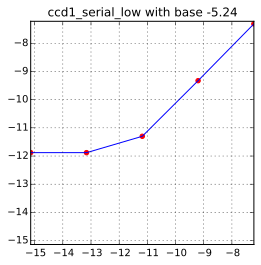

-0.18


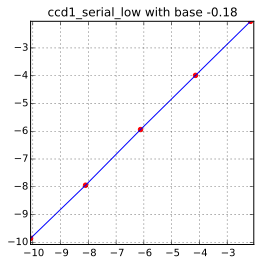

4.88


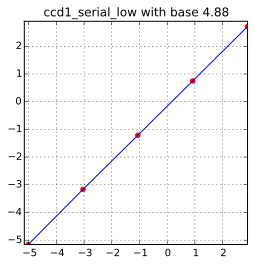

9.94


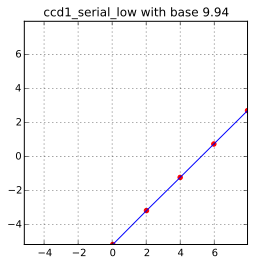

ccd2_output_drain_a
3.0


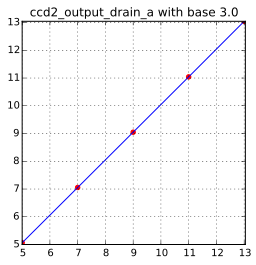

6.0


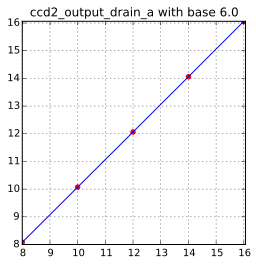

9.0


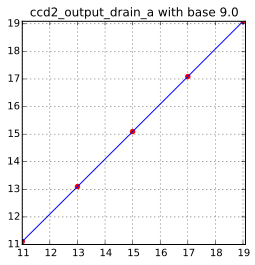

12.0


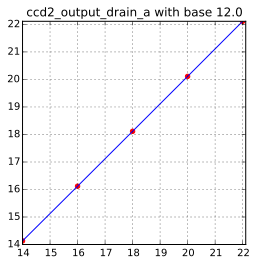

15.0


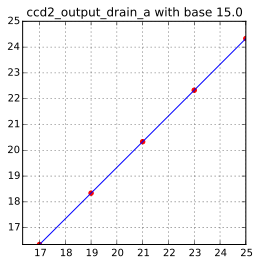

ccd2_output_drain_b
3.0


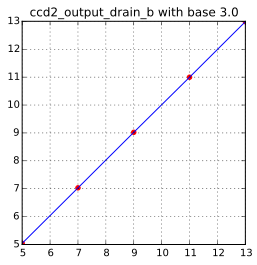

6.0


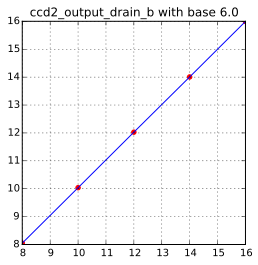

9.0


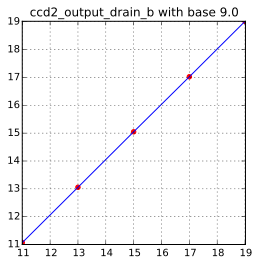

12.0


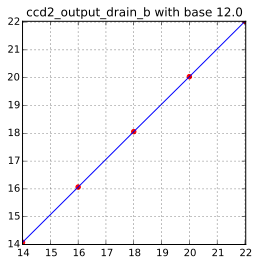

15.0


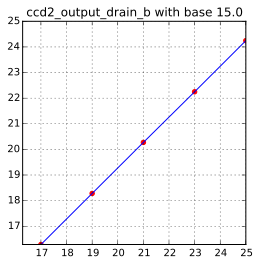

ccd2_output_drain_c
3.0


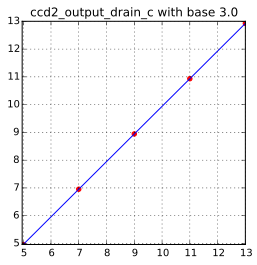

6.0


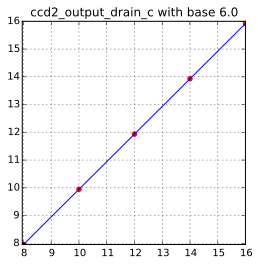

9.0


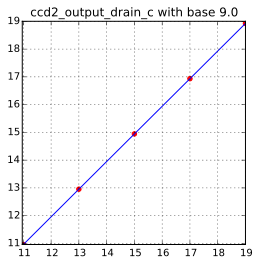

12.0


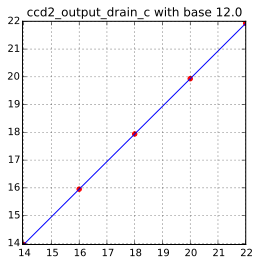

15.0


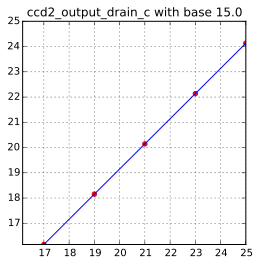

ccd2_output_drain_d
3.0


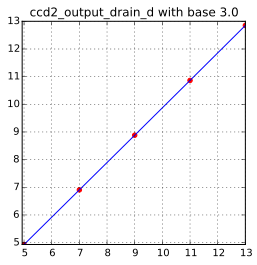

6.0


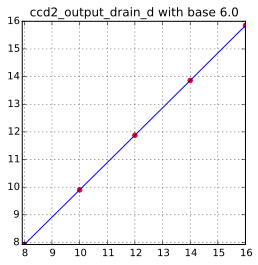

9.0


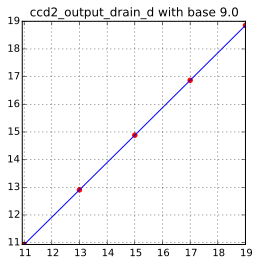

12.0


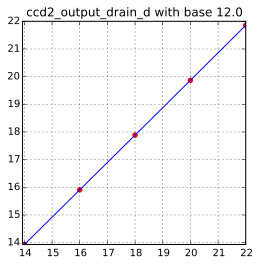

15.0


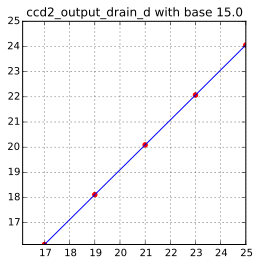

ccd2_parallel_high
-13.2


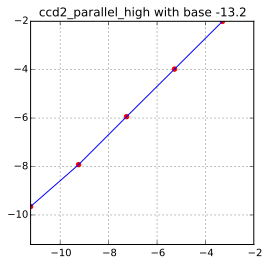

-10.56


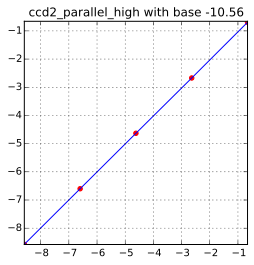

-7.92


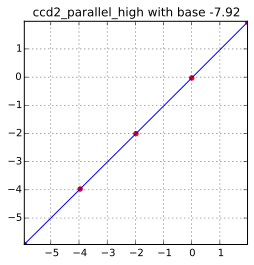

-5.28


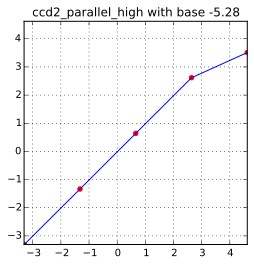

-2.64


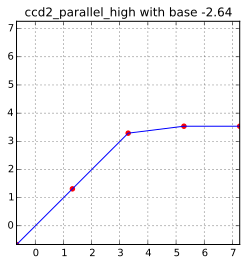

ccd2_reset_low
-10.3


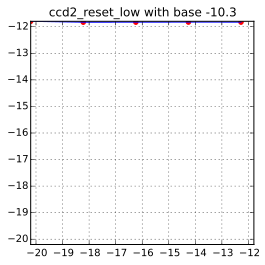

-5.24


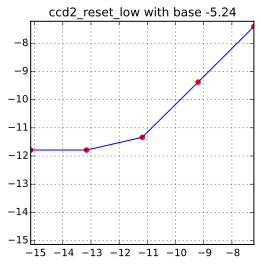

-0.18


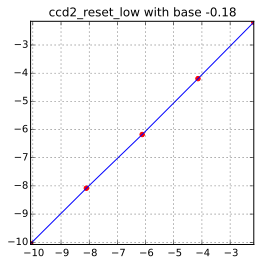

4.88


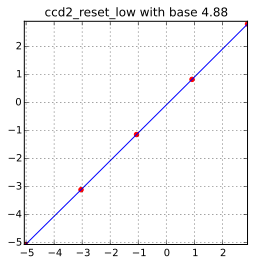

9.94


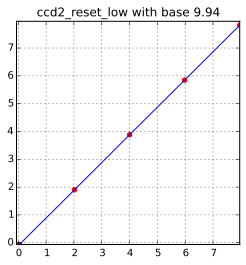

ccd2_serial_low
-10.3


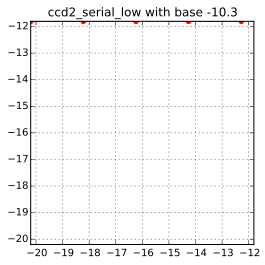

-5.24


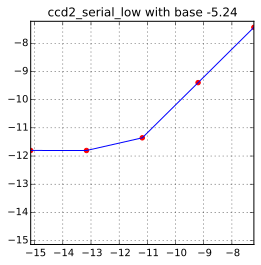

-0.18


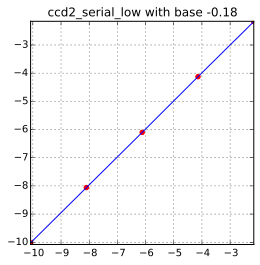

4.88


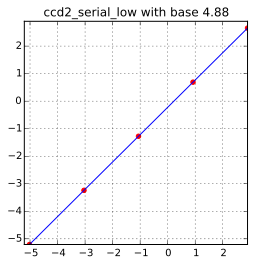

9.94


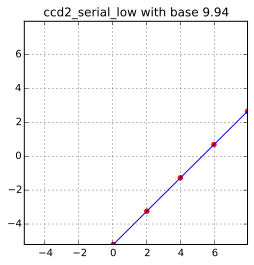

ccd3_output_drain_a
3.0


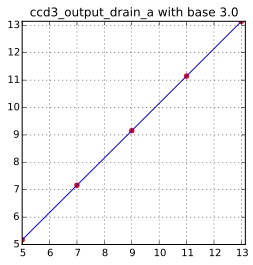

6.0


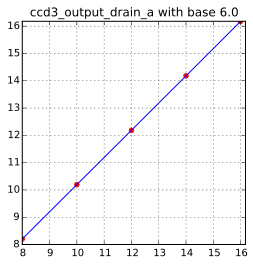

9.0


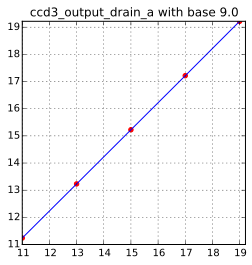

12.0


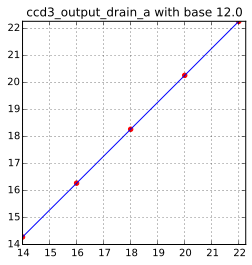

15.0


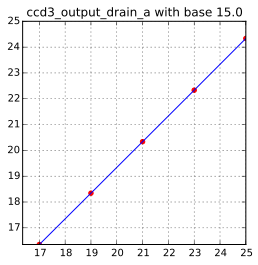

ccd3_output_drain_b
3.0


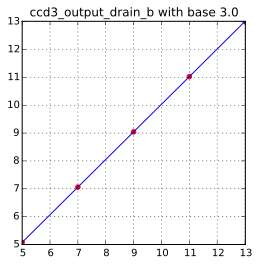

6.0


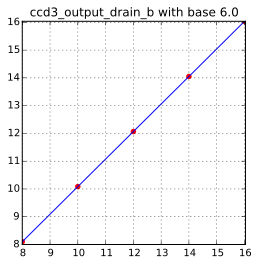

9.0


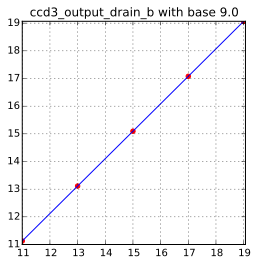

12.0


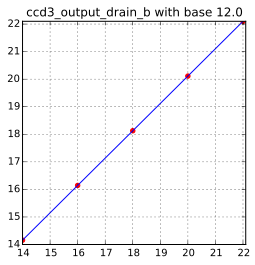

15.0


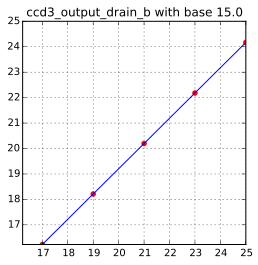

ccd3_output_drain_c
3.0


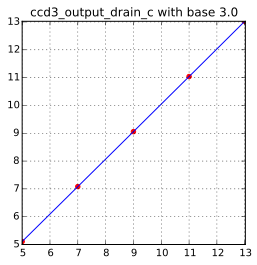

6.0


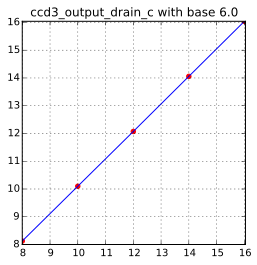

9.0


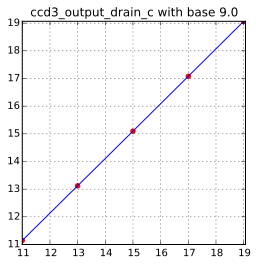

12.0


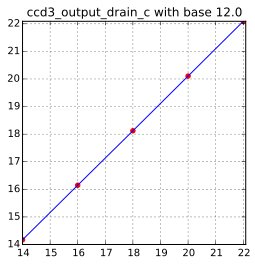

15.0


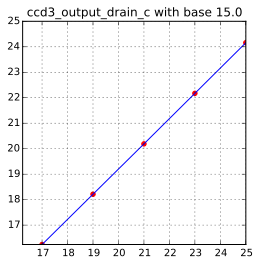

ccd3_output_drain_d
3.0


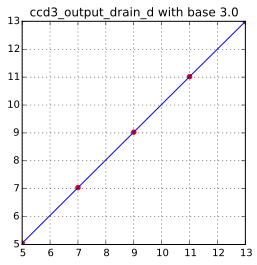

6.0


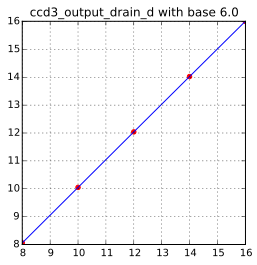

9.0


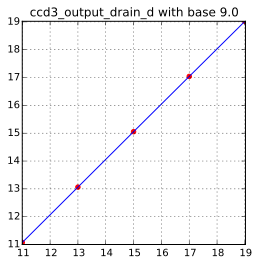

12.0


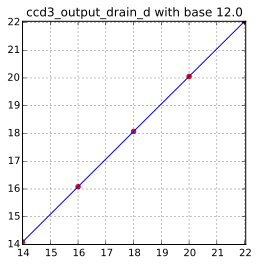

15.0


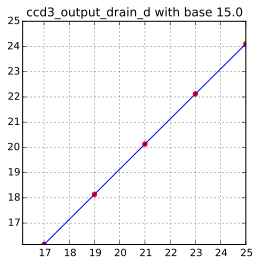

ccd3_parallel_high
-13.2


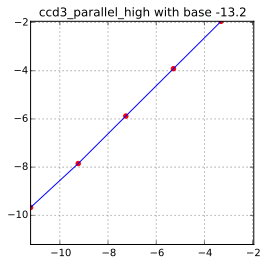

-10.56


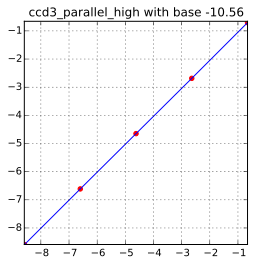

-7.92


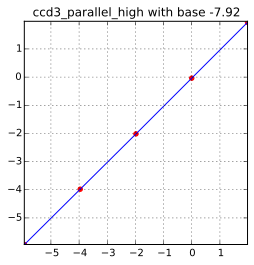

-5.28


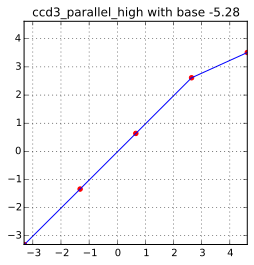

-2.64


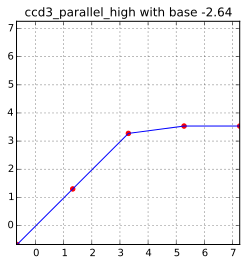

ccd3_reset_low
-10.3


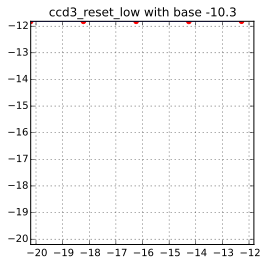

-5.24


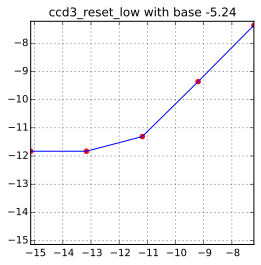

-0.18


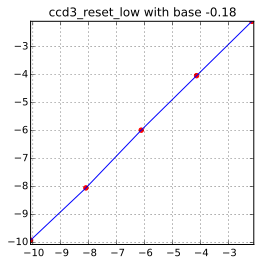

4.88


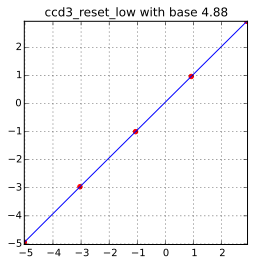

9.94


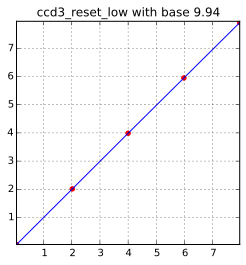

ccd3_serial_low
-10.3


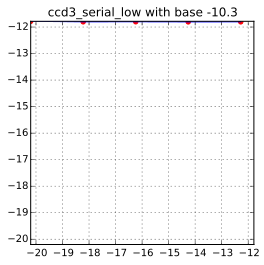

-5.24


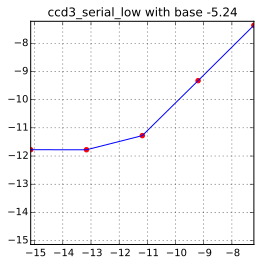

-0.18


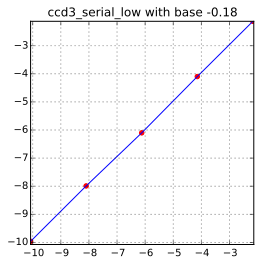

4.88


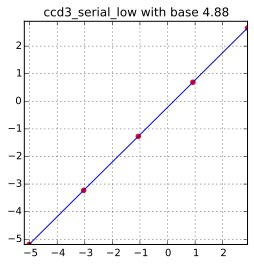

9.94


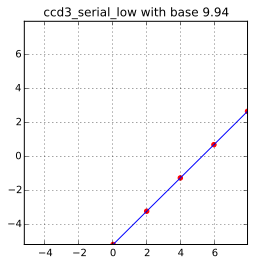

ccd4_output_drain_a
3.0


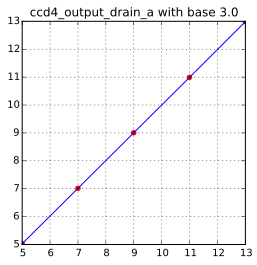

6.0


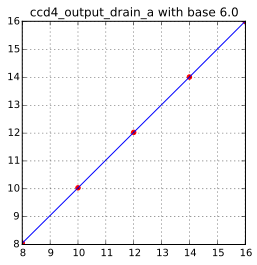

9.0


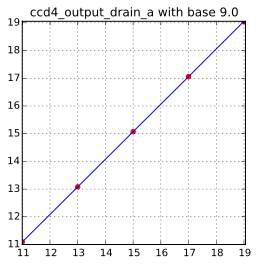

12.0


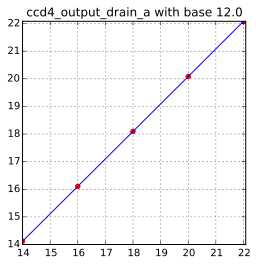

15.0


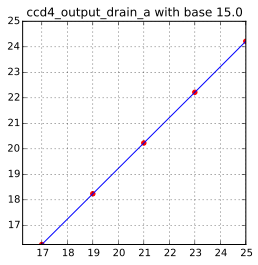

ccd4_output_drain_b
3.0


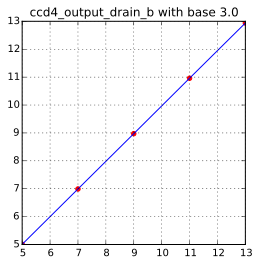

6.0


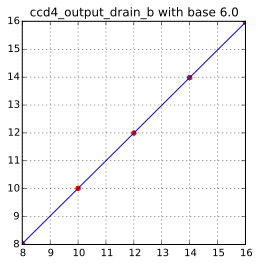

9.0


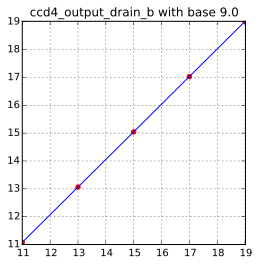

12.0


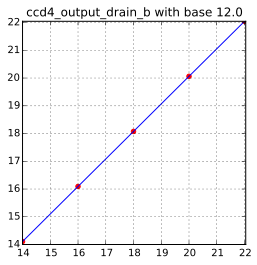

15.0


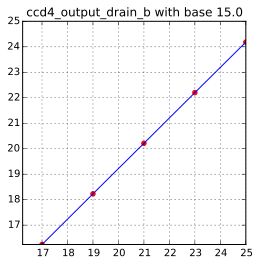

ccd4_output_drain_c
3.0


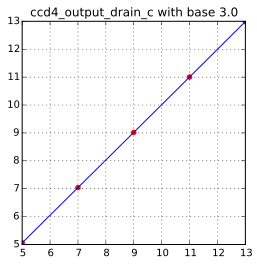

6.0


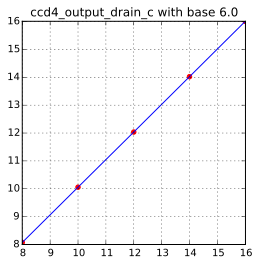

9.0


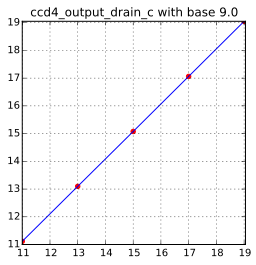

12.0


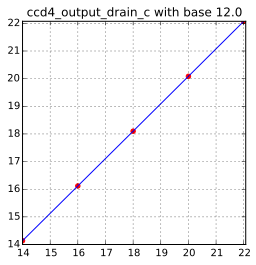

15.0


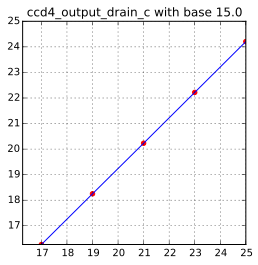

ccd4_output_drain_d
3.0


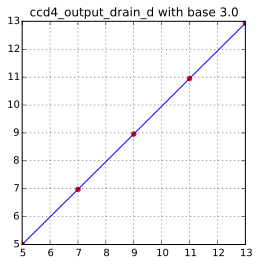

6.0


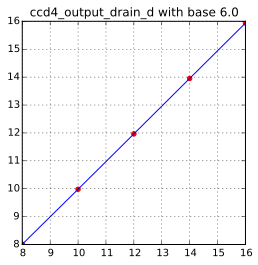

9.0


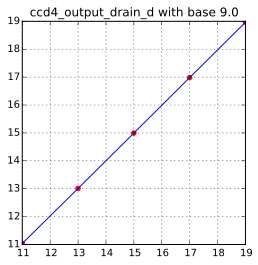

12.0


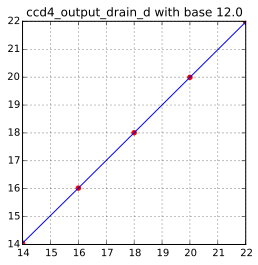

15.0


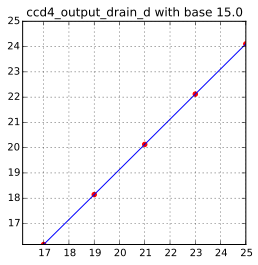

ccd4_parallel_high
-13.2


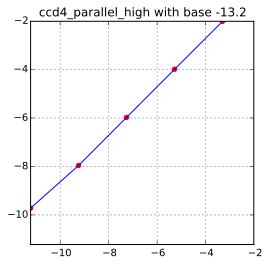

-10.56


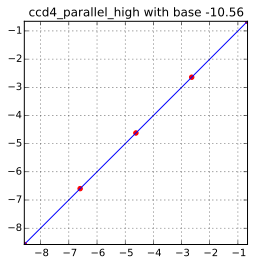

-7.92


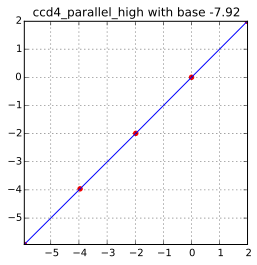

-5.28


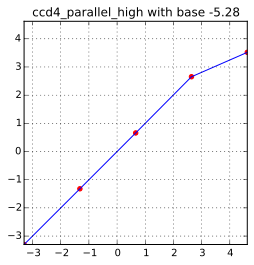

-2.64


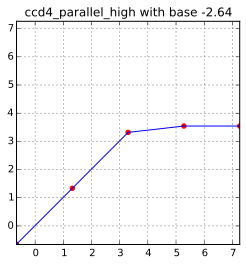

ccd4_reset_low
-10.3


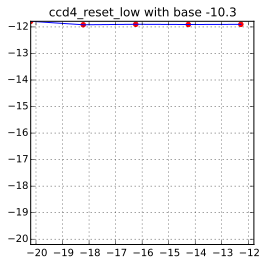

-5.24


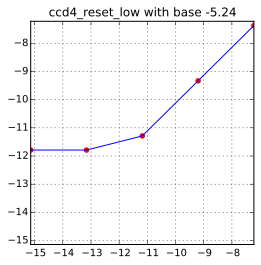

-0.18


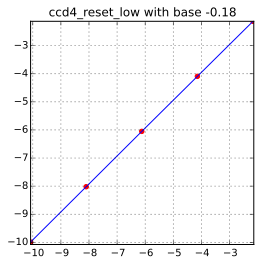

4.88


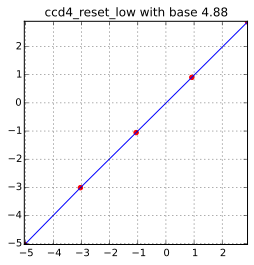

9.94


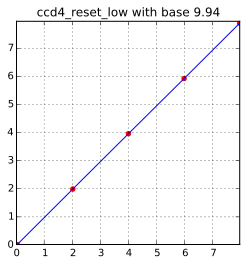

ccd4_serial_low
-10.3


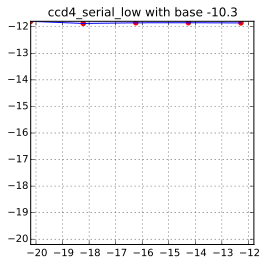

-5.24


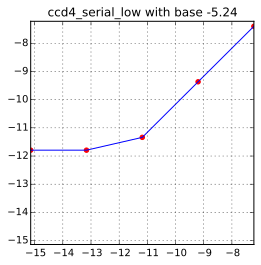

-0.18


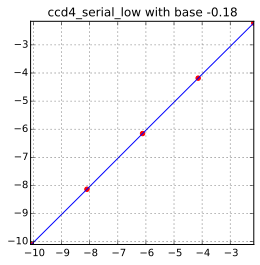

4.88


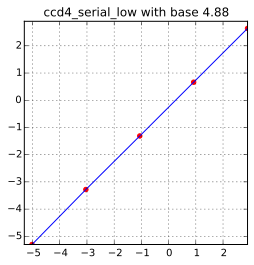

9.94


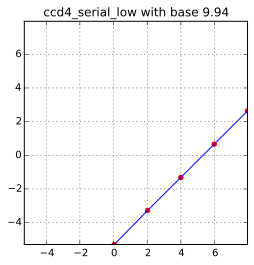

In [15]:
# Plot the set vs. measured values of selected channels:
for nom in sorted(data.keys()):
    print nom
    for base_value in sorted(data[nom].keys()):
        print base_value
        X = data[nom][base_value]["X"]
        Y = data[nom][base_value]["Y"]
        ran = get_range_square(X,Y)
        pylab.ylim(ran)
        pylab.xlim(ran)
        pylab.grid(True)
        plt.axes().set_aspect(1)
        plt.title("{derived_param} with base {base}".format(
                derived_param=nom,
                base=base_value
            ))
        plt.scatter(X,Y,color='red')
        plt.plot(X,Y,color='blue')
        plt.show()